In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

## Data Preprocessing

In [166]:
# turn time series dataset into supervised learning dataset
def create_lag_features(df, target_column, lags):
    df = df.copy()
    for lag in range(1, lags + 1):
        df[f"lag_{lag}"] = df[target_column].shift(lag)
    return df

### SPEI-1

In [167]:
spei1_df = pd.read_csv("/content/SPEI_1_MonthTimescale_1950_2013_Fresno_County.csv")
print(len(spei1_df))
spei1_df.head()

768


,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,0.568691
1,1950-02-15,-119.75,36.75,-0.323044
2,1950-03-16,-119.75,36.75,-0.148050
3,1950-04-16,-119.75,36.75,-0.585959
4,1950-05-16,-119.75,36.75,-0.860067


In [168]:
spei1_df = spei1_df.drop(columns=['lon', 'lat'], axis=1)
spei1_df.head()

,time,spei
0,1950-01-16,0.568691
1,1950-02-15,-0.323044
2,1950-03-16,-0.148050
3,1950-04-16,-0.585959
4,1950-05-16,-0.860067


In [169]:
# create lag features (using last 6 months)
lags = 1
lagged_spei1_data = create_lag_features(spei1_df, "spei", lags)

# drop missing values (first 6 rows will be NaN)
lagged_spei1_data = lagged_spei1_data.dropna()

# Show the new dataset with lag features
lagged_spei1_data.head(2)

,time,spei,lag_1
1,1950-02-15,-0.323044,0.568691
2,1950-03-16,-0.148050,-0.323044


In [170]:
# data splits
train_size = int(len(lagged_spei1_data) * 0.8)
# val_size = int(len(lagged_spei1_data) * 0.1)


# X_train_spei1, y_train_spei1 = lagged_spei1_data[:train_size], lagged_spei1_data[:train_size]
# X_val_spei1, y_val_spei1 = lagged_spei1_data[train_size : train_size + val_size], lagged_spei1_data[train_size : train_size + val_size]
# X_test_spei1, y_test_spei1 = lagged_spei1_data[train_size + val_size :], lagged_spei1_data[train_size + val_size :]

# Split into train and test
train_spei1 = lagged_spei1_data.iloc[:train_size]
test_spei1 = lagged_spei1_data.iloc[train_size:]

# Define X (features) and Y (target)
X_train_spei1, y_train_spei1 = train_spei1.drop(columns=["time", "spei"]), train_spei1["spei"]
X_test_spei1, y_test_spei1 = test_spei1.drop(columns=["time", "spei"]), test_spei1["spei"]


# print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
# print(f"Validation splits (10%):  X_val = {X_val_spei1.shape} | y_val = {y_val_spei1.shape}")
# print(f"Test splits (10%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

In [171]:
X_train_spei1.iloc[0], y_train_spei1.iloc[0]

(lag_1    0.568691
 Name: 1, dtype: float64,
 -0.32304394)

### SPEI-3

In [154]:
spei3_df = pd.read_csv("/content/SPEI_3_MonthTimescale_1950_2013_Fresno.csv")
print(len(spei3_df))
spei3_df.head()

768


,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,-0.113825
1,1950-02-15,-119.75,36.75,-0.082312
2,1950-03-16,-119.75,36.75,-0.025755
3,1950-04-16,-119.75,36.75,-0.624708
4,1950-05-16,-119.75,36.75,-0.823265


In [155]:
spei3_df = spei3_df.drop(columns=['lon', 'lat'], axis=1)
spei3_df.head()

,time,spei
0,1950-01-16,-0.113825
1,1950-02-15,-0.082312
2,1950-03-16,-0.025755
3,1950-04-16,-0.624708
4,1950-05-16,-0.823265


In [156]:
# create lag features (using last 3 months)
lags = 3
lagged_spei3_data = create_lag_features(spei3_df, "spei", lags)

# drop missing values (first 3 rows will be NaN)
lagged_spei3_data = lagged_spei3_data.dropna()

# Show the new dataset with lag features
lagged_spei3_data.head(2)

,time,spei,lag_1,lag_2,lag_3
3,1950-04-16,-0.624708,-0.025755,-0.082312,-0.113825
4,1950-05-16,-0.823265,-0.624708,-0.025755,-0.082312


In [157]:
# data splits
train_size = int(len(lagged_spei3_data) * 0.8)
# val_size = int(len(lagged_spei1_data) * 0.1)


# X_train_spei1, y_train_spei1 = lagged_spei1_data[:train_size], lagged_spei1_data[:train_size]
# X_val_spei1, y_val_spei1 = lagged_spei1_data[train_size : train_size + val_size], lagged_spei1_data[train_size : train_size + val_size]
# X_test_spei1, y_test_spei1 = lagged_spei1_data[train_size + val_size :], lagged_spei1_data[train_size + val_size :]

# Split into train and test
train_spei3 = lagged_spei3_data.iloc[:train_size]
test_spei3 = lagged_spei3_data.iloc[train_size:]

# Define X (features) and Y (target)
X_train_spei3, y_train_spei3 = train_spei3.drop(columns=["time", "spei"]), train_spei3["spei"]
X_test_spei3, y_test_spei3 = test_spei3.drop(columns=["time", "spei"]), test_spei3["spei"]


# print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
# print(f"Validation splits (10%):  X_val = {X_val_spei1.shape} | y_val = {y_val_spei1.shape}")
# print(f"Test splits (10%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

In [151]:
X_train_spei3.iloc[0], y_train_spei3.iloc[0]

(lag_1   -0.025755
 lag_2   -0.082312
 lag_3   -0.113825
 Name: 3, dtype: float64,
 -0.6247076)

### SPEI-6

In [111]:
spei6_df = pd.read_csv("/content/SPEI_6_MonthTimescale_1950_2013_Fresno.csv")
print(len(spei6_df))
spei6_df.head()

768


,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,-0.177393
1,1950-02-15,-119.75,36.75,-0.520186
2,1950-03-16,-119.75,36.75,-0.425508
3,1950-04-16,-119.75,36.75,-0.482449
4,1950-05-16,-119.75,36.75,-0.595851


In [112]:
spei6_df = spei6_df.drop(columns=['lon', 'lat'], axis=1)
spei6_df.head()

,time,spei
0,1950-01-16,-0.177393
1,1950-02-15,-0.520186
2,1950-03-16,-0.425508
3,1950-04-16,-0.482449
4,1950-05-16,-0.595851


In [131]:
# create lag features (using last 6 months)
lags = 6
lagged_spei6_data = create_lag_features(spei6_df, "spei", lags)

# drop missing values (first 6 rows will be NaN)
lagged_spei6_data = lagged_spei6_data.dropna()

# Show the new dataset with lag features
lagged_spei6_data.head(2)

,time,spei,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
6,1950-07-16,-0.753395,-0.379501,-0.595851,-0.482449,-0.425508,-0.520186,-0.177393
7,1950-08-16,-0.883109,-0.753395,-0.379501,-0.595851,-0.482449,-0.425508,-0.520186


In [132]:
# data splits
train_size = int(len(lagged_spei6_data) * 0.8)
# val_size = int(len(lagged_spei1_data) * 0.1)


# X_train_spei1, y_train_spei1 = lagged_spei1_data[:train_size], lagged_spei1_data[:train_size]
# X_val_spei1, y_val_spei1 = lagged_spei1_data[train_size : train_size + val_size], lagged_spei1_data[train_size : train_size + val_size]
# X_test_spei1, y_test_spei1 = lagged_spei1_data[train_size + val_size :], lagged_spei1_data[train_size + val_size :]

# Split into train and test
train_spei6 = lagged_spei6_data.iloc[:train_size]
test_spei6 = lagged_spei6_data.iloc[train_size:]

# Define X (features) and Y (target)
X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]


# print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
# print(f"Validation splits (10%):  X_val = {X_val_spei1.shape} | y_val = {y_val_spei1.shape}")
# print(f"Test splits (10%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

In [133]:
X_train_spei6.iloc[0], y_train_spei6.iloc[0]

(lag_1   -0.379501
 lag_2   -0.595851
 lag_3   -0.482449
 lag_4   -0.425508
 lag_5   -0.520186
 lag_6   -0.177393
 Name: 6, dtype: float64,
 -0.7533954)

## XGBoost | SPEI-1

### Model Training

In [173]:
# model
xgb_model_spei1 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=500,
                             max_depth=5,
                             learning_rate=0.1,
                             random_state=42)

# xgb_model_spei1 = xgb.XGBRegressor(objective="reg:squarederror",
#                                    n_estimators=500,  # Reduce number of trees
#                                    max_depth=5,  # Reduce tree depth
#                                    learning_rate=0.05,  # Lower learning rate
#                                    subsample=0.8,  # Use 80% of data per tree
#                                    colsample_bytree=0.8,  # Use 80% of features per tree
#                                    random_state=42)


# train
xgb_model_spei1.fit(X_train_spei1, y_train_spei1)

# make predictions
y_pred_spei1 = xgb_model_spei1.predict(X_test_spei1)

### Evaluation

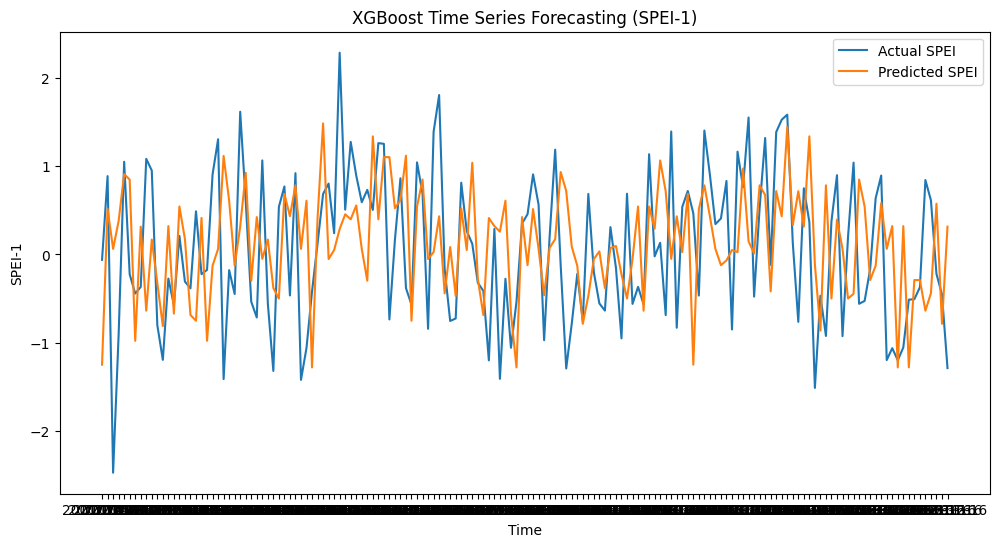

In [174]:
plt.figure(figsize=(12,6))
plt.plot(test_spei1["time"], y_test_spei1, label="Actual SPEI")
plt.plot(test_spei1["time"], y_pred_spei1, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-1)")
plt.show()

In [175]:
# mean absolute error (MAE)
mae_spei1 = mean_absolute_error(y_test_spei1, y_pred_spei1)
print(f"Mean Absolute Error: {mae_spei1}")

Mean Absolute Error: 0.7585518910623466


In [176]:
# mean squared error (MSE)
mse_spei1 = mean_squared_error(y_test_spei1, y_pred_spei1)
print(f"Mean Squared Error: {mse_spei1}")

Mean Squared Error: 0.8593015018363458


In [177]:
# root mean squared error (RMSE)
rmse_spei1 = np.sqrt(mse_spei1)
print(f"Root Mean Squared Error: {rmse_spei1}")

Root Mean Squared Error: 0.926985168077864


In [178]:
# R^2
r2_spei1 = r2_score(y_test_spei1, y_pred_spei1)
print(f"R^2 Score: {r2_spei1}")

R^2 Score: -0.17761061407288325


## XGBoost | SPEI-3

### Model Training

In [158]:

# model
xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=500,
                             max_depth=5,
                             learning_rate=0.1,
                             random_state=42)

# xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,  # Reduce number of trees
#                              max_depth=5,  # Reduce tree depth
#                              learning_rate=0.05,  # Lower learning rate
#                              subsample=0.8,  # Use 80% of data per tree
#                              colsample_bytree=0.8,  # Use 80% of features per tree
#                              random_state=42)


# train
xgb_model_spei3.fit(X_train_spei3, y_train_spei3)

# make predictions
y_pred_spei3 = xgb_model_spei3.predict(X_test_spei3)

### Evaluation

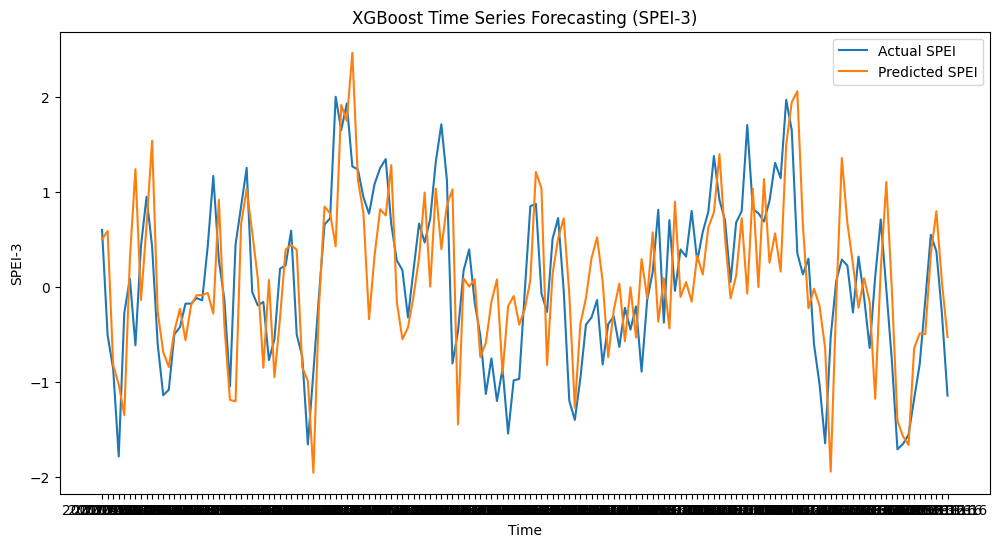

In [160]:
plt.figure(figsize=(12,6))
plt.plot(test_spei3["time"], y_test_spei3, label="Actual SPEI")
plt.plot(test_spei3["time"], y_pred_spei3, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-3")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-3)")
plt.show()

In [161]:
# mean absolute error (MAE)
mae_spei3 = mean_absolute_error(y_test_spei3, y_pred_spei3)
print(f"Mean Absolute Error: {mae_spei3}")

Mean Absolute Error: 0.5595835138620183


In [162]:
# mean squared error (MSE)
mse_spei3 = mean_squared_error(y_test_spei3, y_pred_spei3)
print(f"Mean Squared Error: {mse_spei3}")

Mean Squared Error: 0.4908832135220635


In [163]:
# root mean squared error (RMSE)
rmse_spei3 = np.sqrt(mse_spei3)
print(f"Root Mean Squared Error: {rmse_spei3}")

Root Mean Squared Error: 0.7006305827767323


In [164]:
# R^2
r2_spei3 = r2_score(y_test_spei3, y_pred_spei3)
print(f"R^2 Score: {r2_spei3}")

R^2 Score: 0.30732795388630985


## XGBoost | SPEI-6

### Model Training

In [184]:

# model
xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=500,
                             max_depth=5,
                             learning_rate=0.1,
                             random_state=42)

# xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,  # Reduce number of trees
#                              max_depth=5,  # Reduce tree depth
#                              learning_rate=0.05,  # Lower learning rate
#                              subsample=0.8,  # Use 80% of data per tree
#                              colsample_bytree=0.8,  # Use 80% of features per tree
#                              random_state=42)


# train
xgb_model_spei6.fit(X_train_spei6, y_train_spei6)

# make predictions
y_pred_spei6 = xgb_model_spei6.predict(X_test_spei6)

### Evaluation

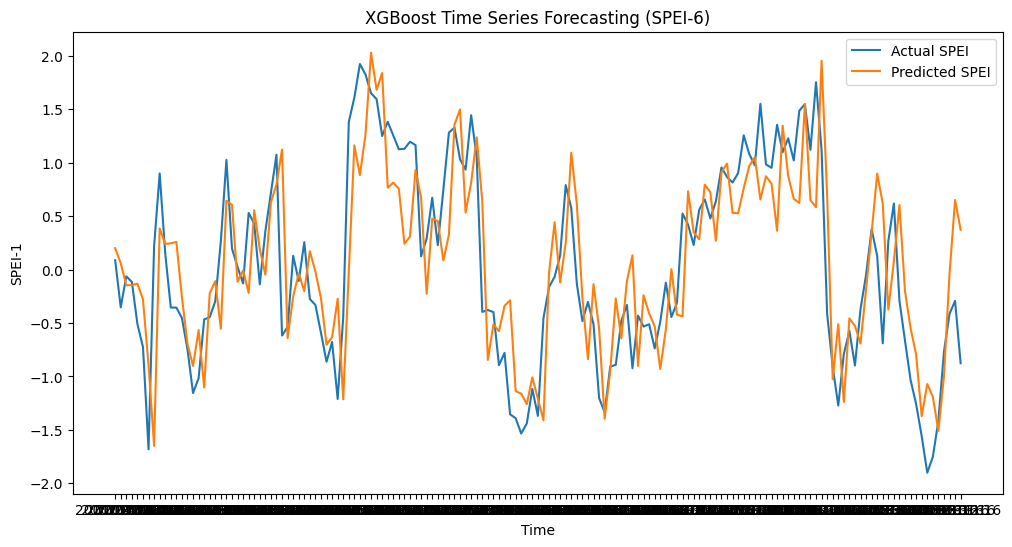

In [185]:
plt.figure(figsize=(12,6))
plt.plot(test_spei6["time"], y_test_spei6, label="Actual SPEI")
plt.plot(test_spei6["time"], y_pred_spei6, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-6)")
plt.show()

In [186]:
# mean absolute error (MAE)
mae_spei6 = mean_absolute_error(y_test_spei6, y_pred_spei6)
print(f"Mean Absolute Error: {mae_spei6}")

Mean Absolute Error: 0.44936056036377253


In [187]:
# mean squared error (MSE)
mse_spei6 = mean_squared_error(y_test_spei6, y_pred_spei6)
print(f"Mean Squared Error: {mse_spei6}")

Mean Squared Error: 0.3217314421107376


In [188]:
# root mean squared error (RMSE)
rmse_spei6 = np.sqrt(mse_spei6)
print(f"Root Mean Squared Error: {rmse_spei6}")

Root Mean Squared Error: 0.5672137534569641


In [182]:
# R^2
r2_spei6 = r2_score(y_test_spei6, y_pred_spei6)
print(f"R^2 Score: {r2_spei6}")

R^2 Score: 0.6088646206832025
